<a href="https://colab.research.google.com/github/gokturkberke/LLM-Engineering-Portfolio/blob/main/pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You create a pipeline using something like
my_pipeline = pipeline("the_task_i_want_to_do")

In [1]:
!pip install -q transformers datasets diffusers

In [7]:
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [6]:
#Sentiment Analysis
classifier = pipeline("sentiment-analysis")
result = classifier("I'm super excited to be on the way to LLM mastery")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9992080330848694}]


In [7]:
#Named entity recognition
ner = pipeline("ner",grouped_entities=True) #grouped entities okuanabirlik anlaminda true olmasi iyi barack obamayi ayri ayri almak yerine PER birlikte aliyo mesela
result = ner("Barack Obama was the 44th president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


[{'entity_group': 'PER', 'score': np.float32(0.99918306), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9986908), 'word': 'United States', 'start': 43, 'end': 56}]


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [9]:
#Question Answering with Context
question_answerer = pipeline("question-answering")
result = question_answerer(question="Where do I work?", context="My name is Sylvain and I work at Hugging Face in Brooklyn")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'score': 0.6949763894081116, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}


In [10]:
# Text Summarization

summarizer = pipeline("summarization")
text = """ Artificial intelligence (AI) has rapidly evolved from a concept in science fiction to a tangible and transformative force in the modern world. Its integration into daily life is becoming increasingly seamless, powering everything from virtual assistants on our smartphones to sophisticated recommendation engines that shape our online experiences. The core of this revolution lies in machine learning, a subset of AI where algorithms are trained on vast amounts of data to recognize patterns, make predictions, and improve over time without being explicitly programmed for each task.

The impact of AI spans numerous industries, fundamentally altering how they operate. In healthcare, AI algorithms are now capable of analyzing medical images like X-rays and MRIs with a level of accuracy that can match or even exceed human radiologists, leading to earlier and more precise diagnoses. The financial sector utilizes AI for fraud detection, instantly analyzing thousands of transactions to identify suspicious activities. Furthermore, the automotive industry is heavily invested in AI to develop autonomous vehicles, which promise to revolutionize transportation by increasing safety and efficiency.

However, the widespread adoption of AI also presents significant challenges and ethical considerations. Issues such as data privacy, algorithmic bias, and the potential for job displacement are at the forefront of the discussion. An AI model is only as good as the data it is trained on, and if that data reflects existing societal biases, the AI can perpetuate or even amplify them. Therefore, developing transparent, fair, and accountable AI systems is crucial for ensuring that this technology benefits humanity as a whole.

Looking to the future, the potential of AI is immense. Advances in areas like natural language processing and reinforcement learning continue to push the boundaries of what machines can do. The goal is not necessarily to replicate human intelligence but to create powerful tools that augment our own capabilities, helping us solve some of the world's most complex problems, from climate change to disease research. The responsible development and ethical deployment of AI will be the key to unlocking this promising future. """

summary = summarizer(text,max_length=50,min_length=25,do_sample=False) #do_sample=False It means that at every step, the model chooses the word with the highest calculated probability. True olsa creativelik artardi
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


 Artificial intelligence (AI) has rapidly evolved from a concept in science fiction to a transformative force in the modern world . The impact of AI spans numerous industries, fundamentally altering how they operate . Issues such as data privacy, algorithmic bias and


In [12]:
#Translation
translator = pipeline("translation_en_to_fr")
result = translator("The Data scientist were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [13]:
# Classification
classifier = pipeline("zero-shot-classification")
result = classifier("Hugging Face's Transformers library is amazaing", candidate_labels = ["technology","sports","politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'sequence': "Hugging Face's Transformers library is amazaing", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9529570937156677, 0.02955668605864048, 0.0174862127751112]}


In [14]:
#Text Generation
generator = pipeline("text-generation")
result = generator("IF there's one thing i want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IF there's one thing i want you to remember about using HuggingFace pipelines, it's that you can easily do the same things with HuggingFace, but with different values.

That's why, for example, HuggingFace is actually better than HuggingFace2, because it supports a different set of values when you type in the value you want. In fact, HuggingFace2 is the same as HuggingFace2, and just like HuggingFace2, it's actually more efficient.

It's not that you have to write the same thing twice, but if you do, you end up with a very nice and clean representation of the input.

I think the most important thing, as far as the user experience goes, is the user experience. If you can't give a good user experience in the first place, then you're going to have a problem. If you can't give a good user experience in the first place, then you're going to have a problem.

So, I think this is probably the most important thing for developers and developers who want to use HuggingFace.

What do you think abo

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

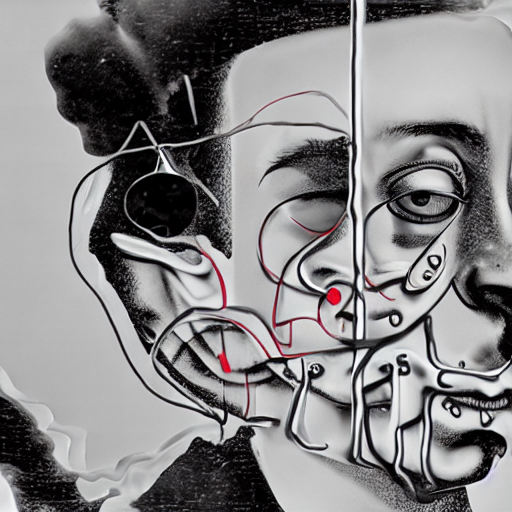

In [4]:
# Image Generation

# image_gen = DiffusionPipeline.from_pretrained(
#     "stabilityai/stable-diffusion-2",
#     torch_dtype=torch.float16,
#     use_safetensor=True,
#     variant="fp16"
# )

# text = "A class of Data Scientist learning about AI, in the surreal style of Salvador Dali"
# image = image_gen(prompt=text).images[0]
# image

# Bu calismadi(sistemim yetmedi su an var olan)
#----------------------------------------------------------------
from diffusers import DiffusionPipeline
import torch

# Daha küçük, hızlı model
image_gen = DiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",  # Daha hafif versiyon
    torch_dtype=torch.float32,
    use_safetensors=True
)

# Düşük adım sayısı (daha hızlı)
text = "A class of Data Scientist learning about AI, in the surreal style of Salvador Dali"
image = image_gen(
    prompt=text,
    num_inference_steps=25,  # 50 yerine 25 (daha hızlı)
    guidance_scale=7.5
).images[0]

image.save("output.png")
image

In [12]:
#Audio Generation

# synthesiser = pipeline("text-to-speech","microsoft/speecht5_tts") #Microsoft'un eğitilmiş ses sentezleme modeli

# embedding_dataset = load_dataset("Matthijs/cmu-arctic-xvectors",split="validation",trust_remote_code=True) #Farklı ses tonları/karakterlerini içeren bir veri seti yüklüyor/validation = veri setinin dogrulama kismini aliyor
# speaker_embedding = torch.tensor(embedding_dataset[7306]["xvector"]).unsqueeze(0) #veri setinden 7306 ses karakterini aliyoruz ve PyTorch formatini cevirip istedigimiz sekle getiriyoruz

# speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!",forward_params={"speaker_embeddings":speaker_embedding})

# sf.write("speech.wav",speech["audio"],samplerate=speech["sampling_rate"])
# #sf.write: soundfile kütüphanesi, ses dosyası kaydetmeye yarar
# #samplerate: Sesin kalitesi (saniyedeki örnek sayısı)
# Audio("speech.wav")

#------------- Artik destekelnmiyomus bu veri seti bu koda geciyoruz-------------
from transformers import pipeline
import torch
import soundfile as sf
from IPython.display import Audio

# Audio Generation
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts")

# Manuel speaker embedding oluştur (veri seti yerine)
speaker_embedding = torch.randn(1, 512)  # 512 boyutlu rastgele ses karakteri

speech = synthesiser(
    "Hi to an artificial intelligence engineer, on the way to mastery!",
    forward_params={"speaker_embeddings": speaker_embedding}
)

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda:0


In [8]:
!pip install soundfile datasets transformers torch